In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read U value data in for house

In [ ]:

excel_url = "https://github.com/Aadam03/Efficient-Use-of-Energy/raw/main/Home%20measurments%20and%20calcs.xlsx"

# Read the Excel file into a DataFrame
sheet_name = 'Final Data'
House_Data = pd.read_excel(excel_url,sheet_name=sheet_name)
Volume = pd.read_excel(excel_url,sheet_name='Volumes')

U_values = House_Data['U ']
U_values = np.array(U_values)
Total_U = U_values[-1]

### Read Temperature data in for Birmingham UK

In [ ]:
Path = 'https://github.com/Aadam03/Efficient-Use-of-Energy/raw/main/Birmingham%20Weather%20Data.xlsx'

weather_data = pd.read_excel(Path)


weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])
# Set 'date' as the index
weather_data.set_index('datetime', inplace=True)

# Resample data to weekly frequency and sum the values
weather_data_weekly = weather_data.resample('W-Mon').mean()

# Reset the index to make 'date' a regular column again
weather_data_weekly.reset_index(inplace=True)

weather_data.reset_index(inplace=True)



Temperatures = (weather_data_weekly['temp'])
Temperatures= Temperatures.apply(lambda x: 20 if x >= 15 else x)


<ipython-input-539-27397eac65a3>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weather_data_weekly = weather_data.resample('W-Mon').mean()


In [ ]:
weather_data_2023 = weather_data[weather_data['datetime'] <= '2023-12-31']

In [ ]:
Temperature = weather_data_2023['temp']
feels_like = weather_data_2023['feelslike']

Temperatures = Temperature.apply(lambda x: 20 if x >= 15 else x)

In [ ]:
Degree_Days = (20 - Temperatures)
Degree_Days.sum()

3057.0

In [ ]:
Daily_heat_load = Total_U * Degree_Days
Annual_heat_load_base_case = Daily_heat_load.sum()
Annual_heat_load_base_case

12576.640218578053

### Circulation

In [ ]:
Rho = 1.2367 # kg/m^3
cp = 0.00028 # kWh/(kg*K)
Volume['Exchanges'] = [4,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,1,4]
Volume['Open Factor'] = [1/24,2/24,0,0/24,0/24,0/24,0,1/24,1/24,2/24,1/24]
Volume['RHO_V_CP_Ex_fac'] = Rho * cp * Volume['Volume (m^3)']*Volume['Exchanges'] * Volume['Open Factor']*24
before_D = Volume['RHO_V_CP_Ex_fac'].sum() # sum rho * Vi * cp * exchanges * open factor

Q_vent = before_D * (20-Degree_Days)
Q_vent.sum()

Volume

,Upstairs Room,Volume (m^3),Exchanges,Open Factor,RHO_V_CP_Ex_fac
0,Upstairs Bathroom,10.769000,4.0,0.041667,0.014916
1,Upstairs Umar,12.604625,0.5,0.083333,0.004365
2,Upstairs Hallway,10.155600,0.5,0.000000,0.000000
3,Upstairs Haroon,23.155688,0.5,0.000000,0.000000
4,Upstairs Mom,48.925000,0.5,0.000000,0.000000
5,Upstairs Attic,31.893750,0.5,0.000000,0.000000
6,Downstairs Hallway,9.745312,0.5,0.000000,0.000000
7,Downstairs Front Room,38.300391,0.5,0.041667,0.006631
8,Downstairs Living Room,39.926250,0.5,0.041667,0.006913
9,Downstairs Kitchen,20.694844,1.0,0.083333,0.014332


### Heat Loss


In [ ]:

# URL of the CSV file on GitHub
url1 = "https://github.com/Aadam03/Efficient-Use-of-Energy/raw/main/Elec%20Data.csv"

# Read the CSV file into a DataFrame
df1 = pd.read_csv(url1)

# URL of the CSV file on GitHub
url2 = "https://github.com/Aadam03/Efficient-Use-of-Energy/raw/main/Gas%20Data.csv"

# Read the CSV file into a DataFrame
df2 = pd.read_csv(url2)


Elec_data = df1
Gas_data = df2
Elec_data = Elec_data.groupby(Elec_data[' Start'])['Consumption (kWh)'].sum().reset_index()  #KWh
Gas_data = Gas_data.groupby(Gas_data[' Start'])['Consumption (m³)'].sum().reset_index()  #KWh
Elec_data['date'] = pd.to_datetime(Elec_data[' Start'], utc=True)
# Gas_data['date'] = pd.to_datetime(Gas_data[' Start'], utc=True)
Gas_data['Consumption (kWh)'] = Gas_data['Consumption (m³)']* 1.02264 *  39.1 /  3.6 #kWh
# Gas_data['date'] = Gas_data['date'].dt.date
Elec_data['date'] = Elec_data['date'].dt.date
Gas_data['Consumption (kWh)'].sum()

1463.3814493533334

In [ ]:
Elec_data['date'] = pd.to_datetime(Elec_data['date'])
# Set 'date' as the index
Elec_data.set_index('date', inplace=True)

# Resample data to weekly frequency and sum the values
Elec_data = Elec_data.resample('W-Mon').sum()

# Reset the index to make 'date' a regular column again
Elec_data.reset_index(inplace=True)



Gas_data['date'] = pd.to_datetime(Gas_data[' Start'], utc=True) # Daily Data
Gas_data['date'] = Gas_data['date'].dt.date
Gas_data['Consumption (kWh)'].sum()

Gas_data['date'] = pd.to_datetime(Gas_data['date'])
# Set 'date' as the index
Gas_data.set_index('date', inplace=True)

# Resample data to weekly frequency and sum the values
Gas_data = Gas_data.resample('W-Mon').sum()

# Reset the index to make 'date' a regular column again
Gas_data.reset_index(inplace=True)

Gas_Data = Gas_data[(Gas_data['date'] >= '2023-01-01') & (Gas_data['date'] <= '2023-12-31')]


Elec_data = Elec_data[(Elec_data['date'] >= '2023-01-01') & (Elec_data['date'] <= '2023-12-31')]


<ipython-input-546-cb101205f4c0>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Elec_data = Elec_data.resample('W-Mon').sum()
<ipython-input-546-cb101205f4c0>:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Gas_data = Gas_data.resample('W-Mon').sum()


In [ ]:
Total_gas_consumption_2023 = Gas_Data['Consumption (kWh)'].sum()
Total_elec_consumption_2023 = Elec_data.sum()

<ipython-input-547-8bf456ed0b2d>:2: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Total_elec_consumption_2023 = Elec_data.sum()


In [ ]:
Total_elec_consumption_2023

Consumption (kWh)    3215.575
dtype: float64

In [ ]:
url = 'https://github.com/Aadam03/Efficient-Use-of-Energy/raw/main/u_values.xlsx'
#url =  "https://github.com/Aadam03/Efficient-Use-of-Energy/raw/main/U%20data.xlsx"


sheet_name = 'Uvalues and areas'
U_values = pd.read_excel(url,sheet_name=sheet_name)

Q_window_summer = U_values['UA_summer'][0]

In [ ]:
Q_window_summer = U_values['UA_summer'][0] * Degree_Days
Q_window_winter = U_values['UA_winter'][0] * Degree_Days

In [ ]:
Q_Door_summer = U_values['UA_summer'][1] * Degree_Days
Q_Door_winter = U_values['UA_winter'][1] * Degree_Days

In [ ]:
Q_wall_summer = U_values['UA_summer'][2] * Degree_Days
Q_wall_winter = U_values['UA_winter'][2] * Degree_Days

In [ ]:
Q_roof_summer = U_values['UA_summer'][3] * Degree_Days
Q_roof_winter = U_values['UA_winter'][3] * Degree_Days

In [ ]:
Q_total_summer = Q_window_summer+Q_Door_summer+Q_wall_summer+Q_roof_summer
Q_total_winter = Q_window_winter+Q_Door_winter+Q_wall_winter+Q_roof_winter


In [ ]:
Q_total_summer

0      405.856480
1      572.547534
2      445.717384
3      289.897486
4      340.629546
          ...    
360    394.985324
361    373.243013
362    481.954570
363    445.717384
364    478.330851
Name: temp, Length: 365, dtype: float64

In [ ]:
Q_total_winter

0      396.345560
1      559.130343
2      435.272356
3      283.103971
4      332.647166
          ...    
360    385.729161
361    364.496363
362    470.660352
363    435.272356
364    467.121552
Name: temp, Length: 365, dtype: float64

In [ ]:
Q_total_winter/1000 *24

0       9.512293
1      13.419128
2      10.446537
3       6.794495
4       7.983532
         ...    
360     9.257500
361     8.747913
362    11.295848
363    10.446537
364    11.210917
Name: temp, Length: 365, dtype: float64

In [ ]:
Q_total = (Q_total_summer + Q_total_winter)/4* 24/1000
Q_total + Q_vent.sum()

Total_elec_consumption_2023

Consumption (kWh)    3215.575
dtype: float64

In [ ]:
Total_gas_consumption_2023


820.5412245066668

In [ ]:
Q_loss = Q_total + Q_vent

Q_loss_vacant =  Q_loss

Q_loss_vacant.sum()

1589.8153080272089

In [ ]:
Heat_gains_daily =  558/365

heat_gains = np.zeros_like(Q_loss)
heat_gains = Heat_gains_daily +heat_gains

In [ ]:
Total_Heating_Demand = Q_loss_vacant - heat_gains

weekly_heat_demand = [sum(Total_Heating_Demand[i:i+7]) for i in range(0, len(Total_Heating_Demand), 7)]
for i in range(17, 35):
    weekly_heat_demand[i] = 0

In [ ]:
weather_data_winter23_2 = weather_data_2023[weather_data_2023['datetime'] >= '2023-01-01']
weather_data_winter23_2 = weather_data_2023[weather_data_2023['datetime'] < '2023-05-01']


weather_data_summer23 = weather_data_2023[weather_data_2023['datetime'] >= '2023-05-01']
weather_data_summer23 = weather_data_2023[weather_data_2023['datetime'] <= '2023-10-01']

weather_data_winter23 = weather_data_2023[weather_data_2023['datetime'] >= '2023-10-01']
weather_data_winter23 = weather_data_2023[weather_data_2023['datetime'] <= '2023-12-31']


In [ ]:


# model_w_1= np.array(-1.85 *  weather_data_winter23_2['temp'] + 35)
# model_s=np.array(0.22 * weather_data_summer23['temp'] + -1.764)
# model_w2=np.array(-1.85 *  weather_data_winter23['temp'] + 35)

# Gas_model = np.concatenate(model_w_1,model_s,model_w2)

# a = np.array(weather_data_winter23_2)
# b = np.array(weather_data_summer23)
# c = np.array(weather_data_winter23)
# Dates = np.concatentate(a,b,c)

import requests
from io import StringIO

# Download the file from GitHub
raw_url = "https://raw.githubusercontent.com/Aadam03/Efficient-Use-of-Energy/main/consumption_analysis%20(1).py"
response = requests.get(raw_url)
response.raise_for_status()

# Create a StringIO object to read the file content
file_content = StringIO(response.text)

# Execute the code
try:
    exec(file_content.read())
except Exception as e:
    print("Error executing Python script:", e)


In [ ]:

# URL of the CSV file on GitHub
url1 = "https://github.com/Aadam03/Efficient-Use-of-Energy/raw/main/Elec%20Data.csv"

# Read the CSV file into a DataFrame
df1 = pd.read_csv(url1)

# URL of the CSV file on GitHub
url2 = "https://github.com/Aadam03/Efficient-Use-of-Energy/raw/main/Gas%20Data.csv"

# Read the CSV file into a DataFrame
df2 = pd.read_csv(url2)


Elec_data = df1
Gas_data = df2
Elec_data = Elec_data.groupby(Elec_data[' Start'])['Consumption (kWh)'].sum().reset_index()  #KWh
Gas_data = Gas_data.groupby(Gas_data[' Start'])['Consumption (m³)'].sum().reset_index()  #KWh
Elec_data['date'] = pd.to_datetime(Elec_data[' Start'], utc=True)
# Gas_data['date'] = pd.to_datetime(Gas_data[' Start'], utc=True)
Gas_data['Consumption (kWh)'] = Gas_data['Consumption (m³)']* 1.02264 *  39.1 /  3.6 #kWh
# Gas_data['date'] = Gas_data['date'].dt.date
Elec_data['date'] = Elec_data['date'].dt.date
Gas_data['Consumption (kWh)'].sum()


Elec_data['date'] = pd.to_datetime(Elec_data['date'])
# Set 'date' as the index
Elec_data.set_index('date', inplace=True)

# Resample data to weekly frequency and sum the values
Elec_data = Elec_data.resample('W-Mon').sum()

# Reset the index to make 'date' a regular column again
Elec_data.reset_index(inplace=True)



Gas_data['date'] = pd.to_datetime(Gas_data[' Start'], utc=True) # Daily Data
Gas_data['date'] = Gas_data['date'].dt.date
Gas_data['Consumption (kWh)'].sum()

Gas_data['date'] = pd.to_datetime(Gas_data['date'])
# Set 'date' as the index
Gas_data.set_index('date', inplace=True)

# Resample data to weekly frequency and sum the values
Gas_data = Gas_data.resample('W-Mon').sum()

# Reset the index to make 'date' a regular column again
Gas_data.reset_index(inplace=True)

Gas_Data = Gas_data[(Gas_data['date'] >= '2023-01-01') & (Gas_data['date'] <= '2023-12-31')]


Elec_data = Elec_data[(Elec_data['date'] >= '2023-01-01') & (Elec_data['date'] <= '2023-12-31')]

<ipython-input-565-ca93f07997b4>:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Elec_data = Elec_data.resample('W-Mon').sum()
<ipython-input-565-ca93f07997b4>:47: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Gas_data = Gas_data.resample('W-Mon').sum()


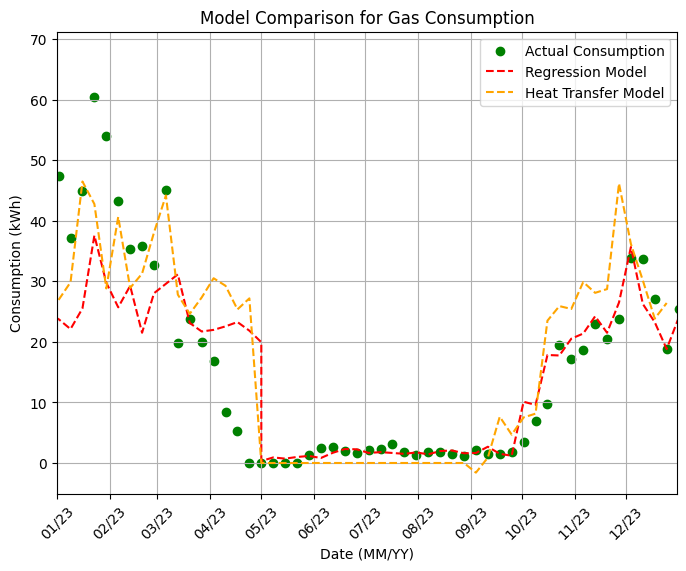

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter
from datetime import datetime



# Increase figure size
plt.figure(figsize=(8, 6))  # Adjust the width and height as needed

plt.scatter(Gaseous_data['Date'], Gaseous_data['Consumption (Kwh)'], label='Actual Consumption', color='green')
plt.plot(all_T, all_G_values, 'r--', label='Regression Model')
#plt.scatter(Gas_data['date'],Gas_data['Consumption (kWh)'],label='Actual Gas Consumption')
plt.plot(Gas_Data['date'], weekly_heat_demand[0:52], color='orange', linestyle='dashed', label='Heat Transfer Model')
plt.legend()
plt.grid()
plt.xlabel('Date (MM/YY)')
plt.ylabel('Consumption (kWh)')
plt.title('Model Comparison for Gas Consumption')
# Set x-axis limits
plt.xlim(datetime(2023, 1, 1), datetime(2023, 12, 31))

# Set monthly ticks
plt.gca().xaxis.set_major_locator(MonthLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%m/%y'))  # Format as mm/yy
# plt.gca().xaxis.set_major_formatter(DateFormatter('%y/%m'))  # Format as yy/mm

# Rotate the tick labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()




In [ ]:
import numpy as np

# Define conditions for winter1, summer1, and winter2
winter1_condition = (Elec_data['date'] < '2023-05-01')
summer1_condition = ((Elec_data['date'] >= '2023-05-01') & (Elec_data['date'] < '2023-09-20'))
winter2_condition = ((Elec_data['date'] >= '2023-09-20') & (Elec_data['date'] < '2023-12-31'))

# Select dates based on conditions
winter1 = np.array(Elec_data['date'][winter1_condition])
summer1 = np.array(Elec_data['date'][summer1_condition])
winter2 = np.array(Elec_data['date'][winter2_condition])

# Create arrays of zeros with the same shape as selected dates
Elec_W1 = np.zeros_like(winter1, dtype=float)
Elec_S1 = np.zeros_like(summer1, dtype=float)
Elec_W2 = np.zeros_like(winter2, dtype=float)

# Assign values to arrays
Elec_W1 += 5048 / 52  # electric heating included
Elec_S1 += 2320 / 52  # no electric heating
Elec_W2 += 5048 / 52  # electric heating included


elec_model = np.concatenate([Elec_W1, Elec_S1, Elec_W2])
dates2 = np.concatenate([winter1,summer1,winter2])


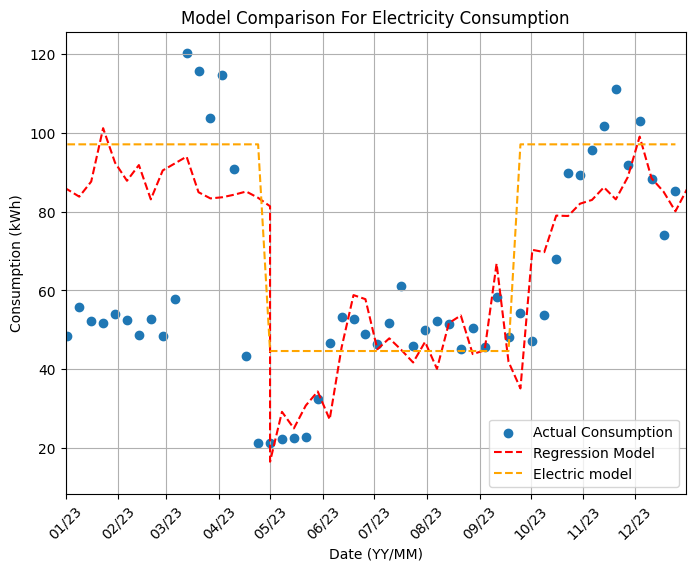

In [ ]:
plt.figure(figsize=(8, 6))  # Adjust the width and height as needed

plt.scatter(Elec_data['date'],Elec_data['Consumption (kWh)'],label='Actual Consumption')
plt.plot(all_T, all_E_values, 'r--', label='Regression Model')
plt.plot(dates2,elec_model,label = 'Electric model',color = 'orange',linestyle='dashed')
# Set x-axis limits
plt.xlim(datetime(2023, 1, 1), datetime(2023, 12, 31))

# Set monthly ticks
plt.gca().xaxis.set_major_locator(MonthLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%m/%y'))  # Format as mm/yy
# plt.gca().xaxis.set_major_formatter(DateFormatter('%y/%m'))  # Format as yy/mm

# Rotate the tick labels for better readability (optional)
plt.xticks(rotation=45)
plt.ylabel('Consumption (kWh)')
plt.title('Model Comparison For Electricity Consumption')
plt.xlabel('Date (YY/MM)')
plt.grid()
# Show the plot
plt.legend()
plt.show()



In [ ]:
all_E_values.sum()


6175.064467513668